<a href="https://colab.research.google.com/github/afortuny/DeepLearningFastAI/blob/main/14_2_Resnet_Deep_Dive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 5.1 MB/s 
     |████████████████████████████████| 365 kB 31.9 MB/s 
     |████████████████████████████████| 4.9 MB 9.4 MB/s 
     |████████████████████████████████| 1.3 MB 33.8 MB/s 
     |████████████████████████████████| 120 kB 16.7 MB/s 
     |████████████████████████████████| 115 kB 33.8 MB/s 
     |████████████████████████████████| 212 kB 19.7 MB/s 
     |████████████████████████████████| 127 kB 43.9 MB/s 
     |████████████████████████████████| 6.6 MB 35.4 MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *

# ResNets

In this chapter, we will build on top of the CNNs introduced in the previous chapter and explain to you the ResNet (residual network) architecture. It was introduced in 2015 by Kaiming He et al. in the article "Deep Residual Learning for Image Recognition" and is by far the most used model architecture nowadays. More recent developments in image models almost always use the same trick of residual connections, and most of the time, they are just a tweak of the original ResNet.

We will first show you the basic ResNet as it was first designed, then explain to you what modern tweaks make it more performant. But first, we will need a problem a little bit more difficult than the MNIST dataset, since we are already close to 100% accuracy with a regular CNN on it.

#Going Back to Imagenette

It's going to be tough to judge any improvements we make to our models when we are already at an accuracy that is as high as we saw on MNIST in the previous chapter, so we will tackle a tougher image classification problem by going back to Imagenette. We'll stick with small images to keep things reasonably fast.

Let's grab the data—we'll use the already-resized 160 px version to make things faster still, and will random crop to 128 px:

In [3]:
def get_data(url, presize, resize):
    path = untar_data(url)
    return DataBlock(
        blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, 
        splitter=GrandparentSplitter(valid_name='val'),
        get_y=parent_label, item_tfms=Resize(presize),
        batch_tfms=[*aug_transforms(min_scale=0.5, size=resize),
                    Normalize.from_stats(*imagenet_stats)],
    ).dataloaders(path, bs=128)

In [4]:
dls = get_data(URLs.IMAGENETTE_160, 160, 128)

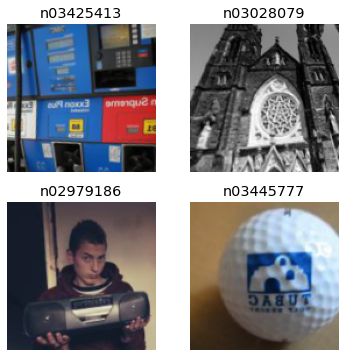

In [5]:
dls.show_batch(max_n=4)